<a href="https://colab.research.google.com/github/eric1645/CSE--/blob/main/cse_HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (1)Find x(t) using the second‐order Runge‐Kutta method with h=0.01


Text(0, 0.5, 'x(t)')

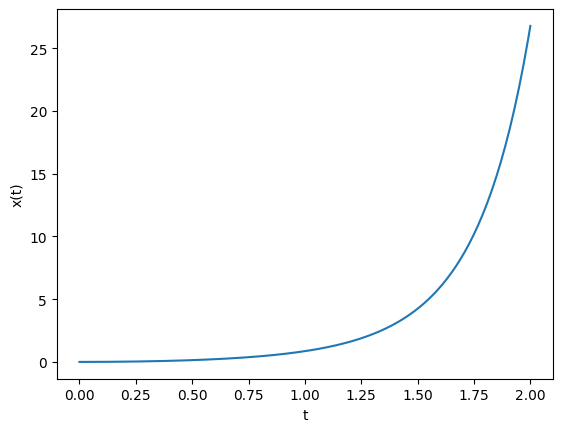

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#미분 방정식
def func(x, t):

  return t + 2*x*t

# time nodes 생성
t_0 = 0
t_end = 2
h = 0.01
t = np.arange(t_0, t_end+h, h)
N = len(t)

#x 초기값
x = np.zeros(N)
x[0] = 0

#RK2 알고리즘
for n in range(N-1):
  k1 = func(x[n], t[n])
  k2 = func(x[n] + h * k1 / 2, t[n] + h/2)
  x[n+1] = x[n] + h * k2

#시각화
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')

###(2) Find x(t) using the fourth‐order Runge‐Kutta method with h=0.01

Text(0, 0.5, 'x(t)')

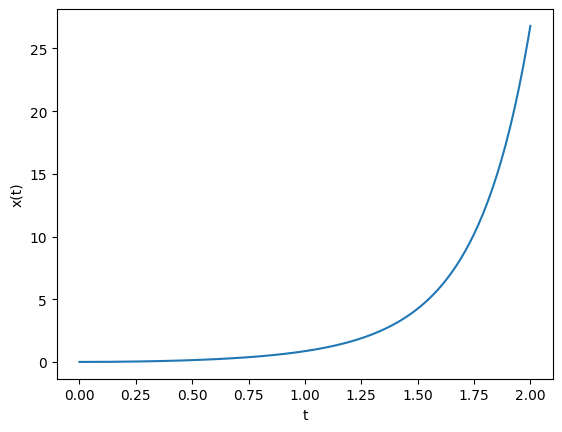

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#미분 방정식
def func(x, t):

  return t + 2*x*t

# time nodes 생성
t_0 = 0
t_end = 2
h = 0.01
t = np.arange(t_0, t_end+h, h)
N = len(t)

#x 초기값
x = np.zeros(N)
x[0] = 0

#RK4 알고리즘
for n in range(N-1):
  k1 = func(x[n], t[n])
  k2 = func(x[n] + h * k1 / 2, t[n] + h / 2)
  k3 = func(x[n] + h * k2 / 2, t[n] + h / 2)
  k4 = func(x[n] + h * k3, t[n] + h)
  x[n+1] = x[n] + h * (k1 + 2*k2 + 2*k3 + k4) / 6

#시각화
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')

### (3) (1)과 (2)의 solution을 exact solution 과 비교하여 각 RK method에 대한 order of accuracy를 분석하시오.

RK2의 order of accuracy: 2.0
RK4의 order of accuracy: 4.0


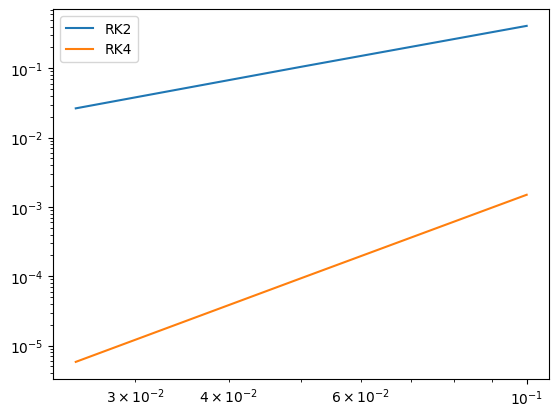

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 미분 방정식
def func(x, t):

  return t + 2*x*t

# exact solution
def x_exact(t):

  return 0.5*(np.exp(t**2)-1)

#RK2 알고리즘
def rk2(t):
  N = len(t)
  x = np.zeros(N)
  x[0] = x0
  for n in range(N-1):
    k1 = func(x[n], t[n])
    x_mid = x[n] + h * k1 / 2
    k2 = func(x_mid, t[n] + h/2)
    x[n+1] = x[n] + h*k2

  return x

#RK4 알고리즘
def rk4(t):
  N = len(t)
  x = np.zeros(N)
  x[0] = x0
  for n in range(N-1):
    k1 = func(x[n], t[n])
    k2 = func(x[n] + h * k1 / 2, t[n] + h / 2)
    k3 = func(x[n] + h * k2 / 2, t[n] + h / 2)
    k4 = func(x[n] + h * k3, t[n] + h)
    x[n+1] = x[n] + h * (k1 + 2*k2 + 2*k3 + k4) / 6

  return x

# error 함수
def error(exact, numerical):

  return np.sqrt(np.mean((exact - numerical)**2))

# 초기 조건
x0 = 0

# time nodes 생성
t_0 = 0
t_end = 2
h_lst = [0.1, 0.05, 0.025]
rk2_errors=[]
rk4_errors=[]

# error 계산
for h in h_lst:
  t = np.arange(t_0, t_end +h, h)
  rk2_errors.append(error(x_exact(t), rk2(t)))
  rk4_errors.append(error(x_exact(t), rk4(t)))

#시각화
plt.loglog(h_lst, rk2_errors, label = 'RK2')
plt.loglog(h_lst, rk4_errors, label = 'RK4')
plt.legend()

#order of accuracy
rk2 = np.polyfit(np.log(h_lst), np.log(rk2_errors), 1)[0]
rk4 = np.polyfit(np.log(h_lst), np.log(rk4_errors), 1)[0]

print(f"RK2의 order of accuracy: {rk2:.1f}")
print(f"RK4의 order of accuracy: {rk4:.1f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 미분 방정식
def func(x, t):

  return t + 2*x*t

# exact solution
def x_exact(t):

  return 0.5*(np.exp(t**2)-1)

#x 초기값
x0 = 0

#RK4 알고리즘
def rk4(t):
  N = len(t)
  x = np.zeros(N)
  x[0] = x0
  for n in range(N-1):
    k1 = func(x[n], t[n])
    k2 = func(x[n] + h * k1 / 2, t[n] + h / 2)
    k3 = func(x[n] + h * k2 / 2, t[n] + h / 2)
    k4 = func(x[n] + h * k3, t[n] + h)
    x[n+1] = x[n] + h * (k1 + 2*k2 + 2*k3 + k4) / 6

  return x

# error 함수
def error(exact, numerical):

  return np.sqrt(np.mean((exact[-1] - numerical[-1])**2))

# time nodes 생성
t_0 = 0
t_end = 2
h_lst = [0.01, 0.05, 0.1]
rk2_errors = []

for h in h_lst:
  t = np.arange(t_0, t_end +h, h)
  rk2_errors.append(error(x_exact(t), rk4(t)))

for i in range(len(h_lst)):
  print(f"h = {h_lst[i]}: error at t=2: {rk2_errors[i]:.5e}")

h = 0.01: error at t=2: 7.55805e-07
h = 0.05: error at t=2: 4.23879e-04
h = 0.1: error at t=2: 5.92067e-03


### 2) (Baseball dynamics)
### fastball

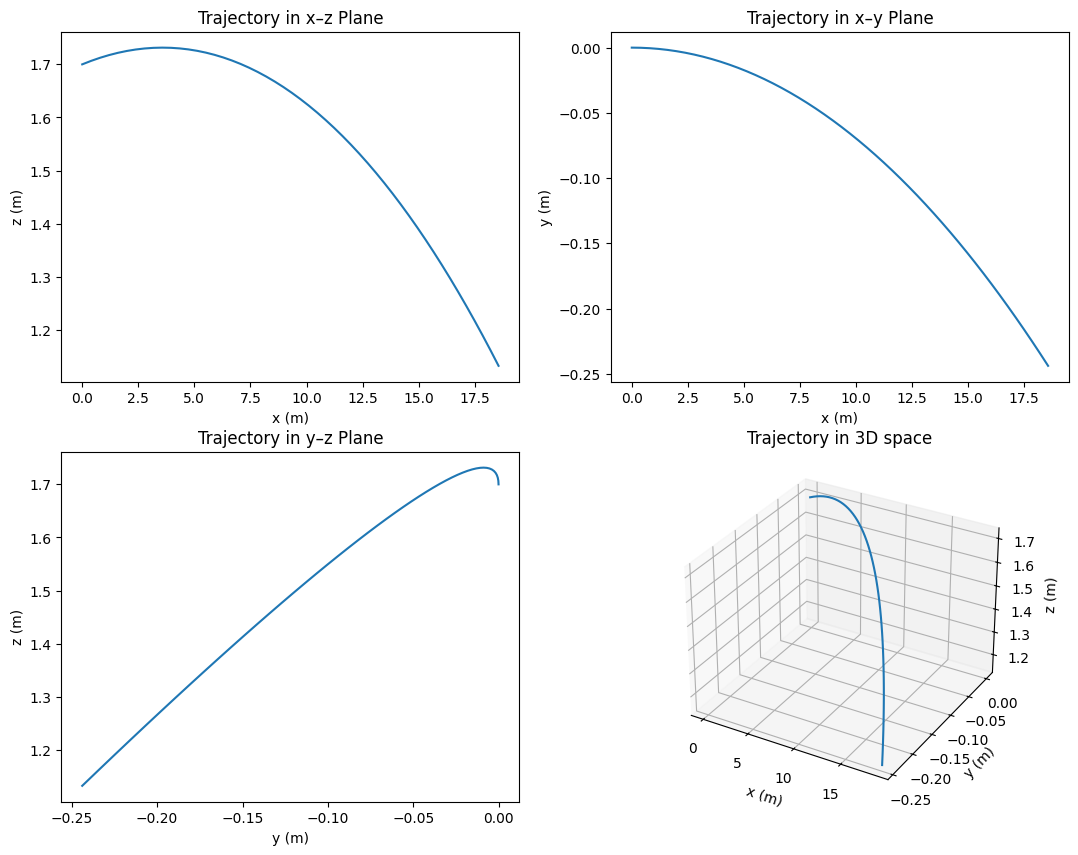

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 항력 함수
def F(V):
    return 0.0039 + 0.0058 / (1 + np.exp((V - 35) / 5))

# 미분 방정식
def states(Y):
    x, y, z, vx, vy, vz = Y
    V = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    dx = vx
    dy = vy
    dz = vz
    dvx = -F(V) * V * vx + B * w * (vz * np.sin(phi) - vy * np.cos(phi))
    dvy = -F(V) * V * vy + B * w * vx * np.cos(phi)
    dvz = -g - F(V) * V * vz - B * w * vx * np.sin(phi)
    return np.array([dx, dy, dz, dvx, dvy, dvz])

# RK4 알고리즘
def rk4(Y):
    y = np.array(Y).reshape(-1, 1)
    while y[0, -1] < 18.39:  # 종료 조건: 공이 포수에게 도달할 때까지
        k1 = states(y[:, -1])
        k2 = states(y[:, -1] + dt * k1 / 2)
        k3 = states(y[:, -1] + dt * k2 / 2)
        k4 = states(y[:, -1] + dt * k3)
        y_new = y[:, -1] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y = np.hstack((y, y_new.reshape(-1, 1)))
    return y

# 파라미터 설정
g = 9.81
B = 4.1e-4
w = 1800 * 2 * np.pi / 60
theta = np.radians(1)
h = 1.7
dt = 0.01
#fastball
v0 = 40
phi = np.radians(225)

# 초기 조건
y0 = [0, 0, h, v0 * np.cos(theta), 0, v0 * np.sin(theta)]

result = rk4(y0)
x = result[0]
y = result[1]
z = result[2]

fig = plt.figure(figsize = (13, 10))
#xz plane
plt.subplot(2, 2, 1)
plt.plot(x, z)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in x–z Plane')

#xy plane
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory in x–y Plane')

#yz plane
plt.subplot(2, 2, 3)
plt.plot(y, z)
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in y–z Plane')

#3D trajectory
ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.plot(x, y, z)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.title('Trajectory in 3D space')

plt.show()

### curveball

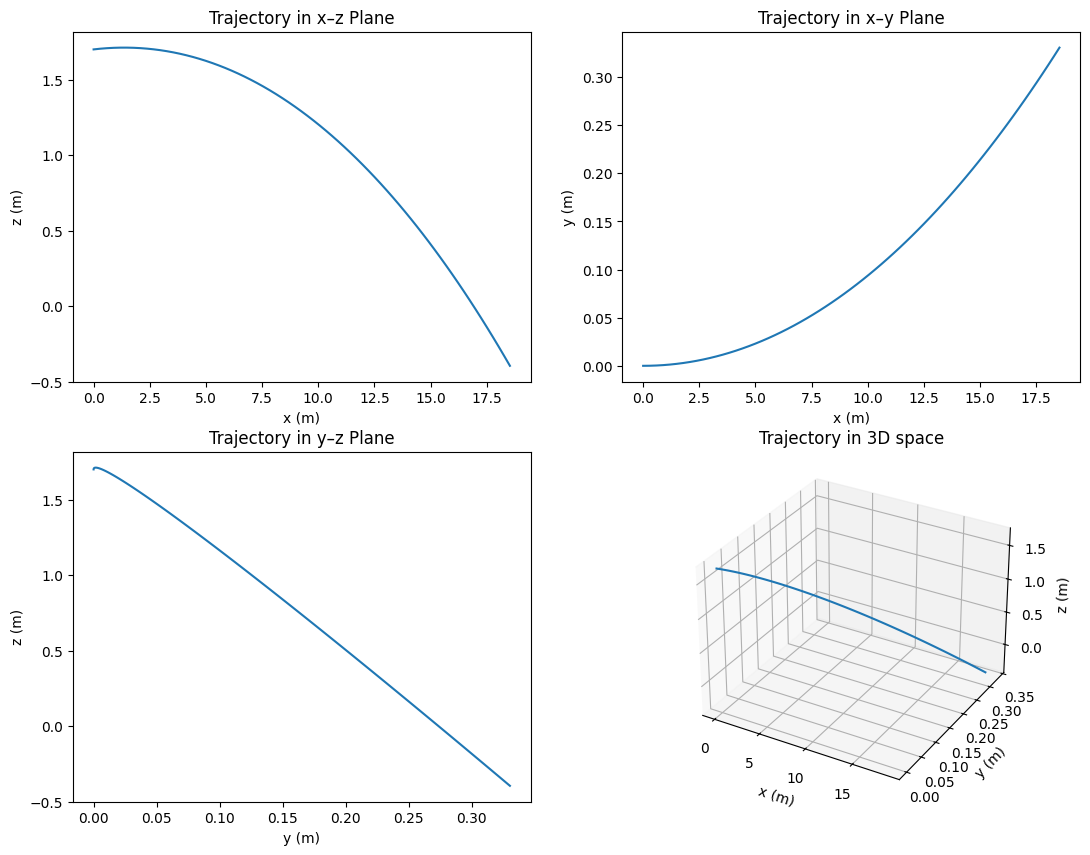

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 항력 함수
def F(V):
    return 0.0039 + 0.0058 / (1 + np.exp((V - 35) / 5))

# 미분 방정식
def states(Y):
    x, y, z, vx, vy, vz = Y
    V = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    dx = vx
    dy = vy
    dz = vz
    dvx = -F(V) * V * vx + B * w * (vz * np.sin(phi) - vy * np.cos(phi))
    dvy = -F(V) * V * vy + B * w * vx * np.cos(phi)
    dvz = -g - F(V) * V * vz - B * w * vx * np.sin(phi)
    return np.array([dx, dy, dz, dvx, dvy, dvz])

# RK4 알고리즘
def rk4(Y):
    y = np.array(Y).reshape(-1, 1)
    while y[0, -1] < 18.39:  # 종료 조건: 공이 포수에게 도달할 때까지
        k1 = states(y[:, -1])
        k2 = states(y[:, -1] + dt * k1 / 2)
        k3 = states(y[:, -1] + dt * k2 / 2)
        k4 = states(y[:, -1] + dt * k3)
        y_new = y[:, -1] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y = np.hstack((y, y_new.reshape(-1, 1)))
    return y

# 파라미터 설정
g = 9.81
B = 4.1e-4
w = 1800 * 2 * np.pi / 60
theta = np.radians(1)
h = 1.7
dt = 0.01
#fastball
v0 = 30
phi = np.radians(45)

# 초기 조건
y0 = [0, 0, h, v0 * np.cos(theta), 0, v0 * np.sin(theta)]

result = rk4(y0)
x = result[0]
y = result[1]
z = result[2]

fig = plt.figure(figsize = (13, 10))
#xz plane
plt.subplot(2, 2, 1)
plt.plot(x, z)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in x–z Plane')

#xy plane
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory in x–y Plane')

#yz plane
plt.subplot(2, 2, 3)
plt.plot(y, z)
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in y–z Plane')

#3D trajectory
ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.plot(x, y, z)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.title('Trajectory in 3D space')

plt.show()

### slider

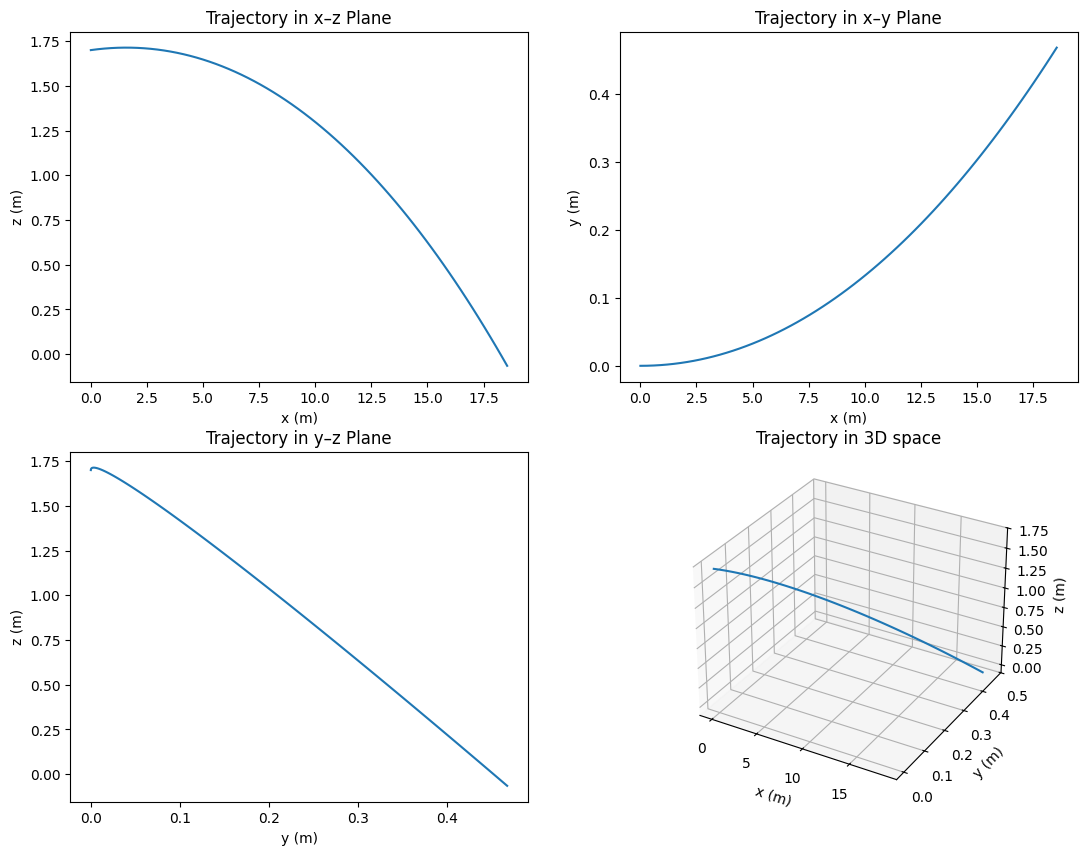

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 항력 함수
def F(V):
    return 0.0039 + 0.0058 / (1 + np.exp((V - 35) / 5))

# 미분 방정식
def states(Y):
    x, y, z, vx, vy, vz = Y
    V = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    dx = vx
    dy = vy
    dz = vz
    dvx = -F(V) * V * vx + B * w * (vz * np.sin(phi) - vy * np.cos(phi))
    dvy = -F(V) * V * vy + B * w * vx * np.cos(phi)
    dvz = -g - F(V) * V * vz - B * w * vx * np.sin(phi)
    return np.array([dx, dy, dz, dvx, dvy, dvz])

# RK4 알고리즘
def rk4(Y):
    y = np.array(Y).reshape(-1, 1)
    while y[0, -1] < 18.39:  # 종료 조건: 공이 포수에게 도달할 때까지
        k1 = states(y[:, -1])
        k2 = states(y[:, -1] + dt * k1 / 2)
        k3 = states(y[:, -1] + dt * k2 / 2)
        k4 = states(y[:, -1] + dt * k3)
        y_new = y[:, -1] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y = np.hstack((y, y_new.reshape(-1, 1)))
    return y

# 파라미터 설정
g = 9.81
B = 4.1e-4
w = 1800 * 2 * np.pi / 60
theta = np.radians(1)
h = 1.7
dt = 0.01
#slider
v0 = 30
phi = np.radians(0)

# 초기 조건
y0 = [0, 0, h, v0 * np.cos(theta), 0, v0 * np.sin(theta)]

result = rk4(y0)
x = result[0]
y = result[1]
z = result[2]

fig = plt.figure(figsize = (13, 10))
#xz plane
plt.subplot(2, 2, 1)
plt.plot(x, z)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in x–z Plane')

#xy plane
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory in x–y Plane')

#yz plane
plt.subplot(2, 2, 3)
plt.plot(y, z)
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in y–z Plane')

#3D trajectory
ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.plot(x, y, z)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.title('Trajectory in 3D space')

plt.show()

### screwball

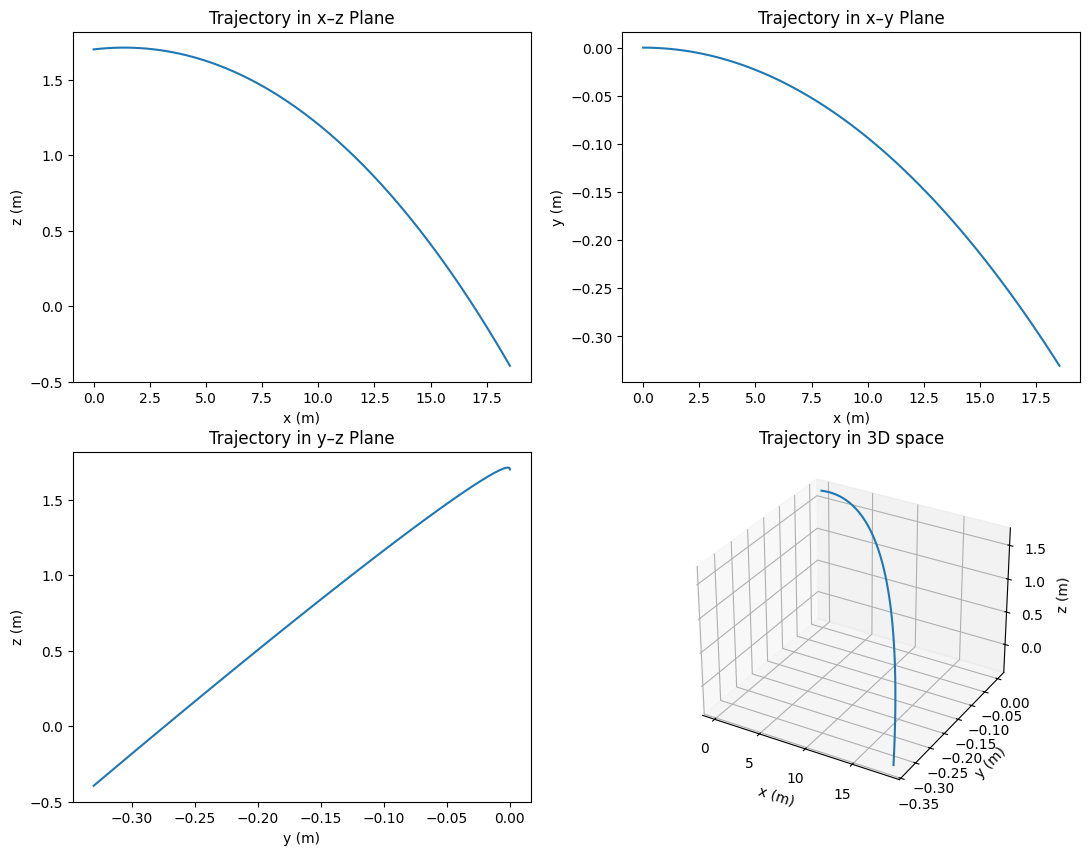

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 항력 함수
def F(V):
    return 0.0039 + 0.0058 / (1 + np.exp((V - 35) / 5))

# 미분 방정식
def states(Y):
    x, y, z, vx, vy, vz = Y
    V = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    dx = vx
    dy = vy
    dz = vz
    dvx = -F(V) * V * vx + B * w * (vz * np.sin(phi) - vy * np.cos(phi))
    dvy = -F(V) * V * vy + B * w * vx * np.cos(phi)
    dvz = -g - F(V) * V * vz - B * w * vx * np.sin(phi)
    return np.array([dx, dy, dz, dvx, dvy, dvz])

# RK4 알고리즘
def rk4(Y):
    y = np.array(Y).reshape(-1, 1)
    while y[0, -1] < 18.39:  # 종료 조건: 공이 포수에게 도달할 때까지
        k1 = states(y[:, -1])
        k2 = states(y[:, -1] + dt * k1 / 2)
        k3 = states(y[:, -1] + dt * k2 / 2)
        k4 = states(y[:, -1] + dt * k3)
        y_new = y[:, -1] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y = np.hstack((y, y_new.reshape(-1, 1)))
    return y

# 파라미터 설정
g = 9.81
B = 4.1e-4
w = 1800 * 2 * np.pi / 60
theta = np.radians(1)
h = 1.7
dt = 0.01
#screwball
v0 = 30
phi = np.radians(135)

# 초기 조건
y0 = [0, 0, h, v0 * np.cos(theta), 0, v0 * np.sin(theta)]

result = rk4(y0)
x = result[0]
y = result[1]
z = result[2]

fig = plt.figure(figsize = (13, 10))
#xz plane
plt.subplot(2, 2, 1)
plt.plot(x, z)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in x–z Plane')

#xy plane
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory in x–y Plane')

#yz plane
plt.subplot(2, 2, 3)
plt.plot(y, z)
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.title('Trajectory in y–z Plane')

#3D trajectory
ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.plot(x, y, z)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.title('Trajectory in 3D space')

plt.show()